# Project 2: 

This project uses a dataset from DataGov: https://catalog.data.gov/dataset/biodiversity-by-county-distribution-of-animals-plants-and-natural-communities



The dataset has county level information for New York State on the presence and distribution of plant and animal species. It contains 20507 entries and 12 columns.

The data combines records from three major sources: 

- The first source is the New York Natural Heritage Program, which tracks rare animals, rare plants, and high quality habitats.
- The second source is the New York State Breeding Bird Atlas, which documented breeding bird species from 2000 to 2005.
- The third source is the New York State Reptile and Amphibian Database, which includes observations from the Herp Atlas project from 1990 to 1999.

Together, these sources show which species groups appear in each county and provide a broad view of biodiversity patterns across the state.

My objectives are:

• Identify counties with the highest biodiversity.

• Compare biodiversity across taxonomic groups.

• Examine how conservation status varies across regions.

• Check which counties have more rare or at risk species.

## 1) Data Cleaning/Preprocessing

#### Import Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
biodiversity = pd.read_csv("Biodiversity.csv")
biodiversity.head()

,County,Category,Taxonomic Group,Taxonomic Subgroup,Scientific Name,Common Name,Year Last Documented,NY Listing Status,Federal Listing Status,State Conservation Rank,Global Conservation Rank,Distribution Status
0,Albany,Animal,Amphibians,Frogs and Toads,Anaxyrus americanus,American Toad,1990-1999,Game with open season,not listed,S5,G5,Recently Confirmed
1,Albany,Animal,Amphibians,Frogs and Toads,Anaxyrus fowleri,Fowler's Toad,1990-1999,Game with open season,not listed,S4,G5,Recently Confirmed
2,Albany,Animal,Amphibians,Frogs and Toads,Hyla versicolor,Gray Treefrog,1990-1999,Game with open season,not listed,S5,G5,Recently Confirmed
3,Albany,Animal,Amphibians,Frogs and Toads,Lithobates catesbeianus,Bullfrog,1990-1999,Game with open season,not listed,S5,G5,Recently Confirmed
4,Albany,Animal,Amphibians,Frogs and Toads,Lithobates clamitans,Green Frog,1990-1999,Game with open season,not listed,S5,G5,Recently Confirmed


In [4]:
biodiversity.describe()

,County,Category,Taxonomic Group,Taxonomic Subgroup,Scientific Name,Common Name,Year Last Documented,NY Listing Status,Federal Listing Status,State Conservation Rank,Global Conservation Rank,Distribution Status
count,20507,20507,20507,20507,20507,20507,20507,20507,20507,20507,20507,20507
unique,66,3,27,105,1582,1578,187,11,6,43,63,4
top,Suffolk,Animal,Birds,Other Flowering Plants,Lasionycteris noctivagans,Great Blue Heron,2000-2005,Protected Bird,not listed,S5B,G5,Recently Confirmed
freq,733,13611,9678,3185,62,62,8939,7011,19220,4189,15062,16127


In [5]:
biodiversity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   County                    20507 non-null  object
 1   Category                  20507 non-null  object
 2   Taxonomic Group           20507 non-null  object
 3   Taxonomic Subgroup        20507 non-null  object
 4   Scientific Name           20507 non-null  object
 5   Common Name               20507 non-null  object
 6   Year Last Documented      20507 non-null  object
 7   NY Listing Status         20507 non-null  object
 8   Federal Listing Status    20507 non-null  object
 9   State Conservation Rank   20507 non-null  object
 10  Global Conservation Rank  20507 non-null  object
 11  Distribution Status       20507 non-null  object
dtypes: object(12)
memory usage: 1.9+ MB


#### Rename and Reorder Column

In [6]:
biodiversity_simple = biodiversity.rename(columns={'County': 'County','Category': 'Category','Taxonomic Group': 'Tax_group', 
                                                   'Taxonomic Subgroup': 'Tax_subgroup','Scientific Name': 'Species_scientific',
                                                   'Common Name': 'Common_species', 'Year Last Documented': 'Year_last', 
                                                   'NY Listing Status': 'NY_status', 'Federal Listing Status': 'Fed_status', 
                                                   'State Conservation Rank': 'State_rank', 'Global Conservation Rank': 'Global_rank',
                                                   'Distribution Status': 'Distribution'})

In [7]:
print(biodiversity_simple.select_dtypes(include='object').columns.tolist()) #print column names as is

['County', 'Category', 'Tax_group', 'Tax_subgroup', 'Species_scientific', 'Common_species', 'Year_last', 'NY_status', 'Fed_status', 'State_rank', 'Global_rank', 'Distribution']


In [8]:
num_rows, num_cols = biodiversity_simple.shape
num_counties = biodiversity_simple["County"].nunique()
num_species = biodiversity_simple["Species_scientific"].nunique()

print("Rows:", num_rows)
print("Columns:", num_cols)
print("Number of counties:", num_counties)
print("Number of unique species:", num_species)

Rows: 20507
Columns: 12
Number of counties: 66
Number of unique species: 1582


#### Making Sure All Number Vals are Ints/Floats

In [9]:
for col in biodiversity_simple.columns:
    if biodiversity_simple[col].dtype == "object":
        biodiversity_simple[col] = biodiversity_simple[col].str.strip()

# Print data types after stripping
print(biodiversity_simple.dtypes)

# Convert 'Year_last_documented' to numeric, coercing errors to NaN
biodiversity_simple["Year_last"] = pd.to_numeric(
    biodiversity_simple["Year_last"],
    errors="coerce"
)

# print statistics for 'Year_last_documented'
print(biodiversity_simple["Year_last"].describe())

County                object
Category              object
Tax_group             object
Tax_subgroup          object
Species_scientific    object
Common_species        object
Year_last             object
NY_status             object
Fed_status            object
State_rank            object
Global_rank           object
Distribution          object
dtype: object
count    5478.000000
mean     1987.048375
std        41.031906
min      1800.000000
25%      1986.000000
50%      2004.000000
75%      2015.000000
max      2021.000000
Name: Year_last, dtype: float64


#### Missing Values

In [10]:
missing_values = biodiversity_simple.isna().sum()
proportion_missing = missing_values / biodiversity_simple.shape[0] 
print(f'Missing proportions of variables:\n{proportion_missing.sort_values(ascending=False)}')

Missing proportions of variables:
Year_last             0.732872
County                0.000000
Category              0.000000
Tax_group             0.000000
Tax_subgroup          0.000000
Species_scientific    0.000000
Common_species        0.000000
NY_status             0.000000
Fed_status            0.000000
State_rank            0.000000
Global_rank           0.000000
Distribution          0.000000
dtype: float64


<Axes: >

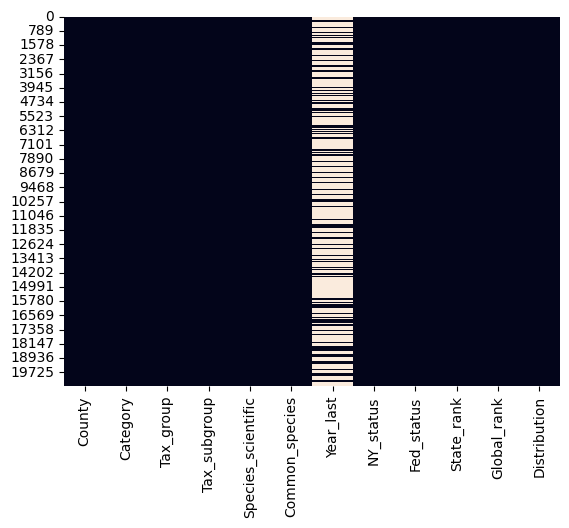

In [11]:
sns.heatmap(biodiversity_simple.isna(), cbar=False)

The variables with the most significant proportions of missing variables is Year_last is missing for about 75% of the records, but it does not affect any part of the analysis because none of the project objectives rely on this variable. I chose to keep the column because it preserves the original structure of the dataset and keeps useful source information available, even if it is incomplete. The missing values stay contained within that field and do not influence species counts, taxonomic groups, conservation status, or rare species totals. I also checked for duplicates and found none, so no rows needed to be removed.

In [12]:
biodiversity_simple = biodiversity_simple.drop("Year_last", axis=1)

I removed Year_last_documented because it has a high missing rate and does not contribute to any of my project objectives, so keeping it would not add value to the analysis.

In [13]:
missing_values = biodiversity_simple.isna().sum()
missing_per_row = biodiversity_simple.isna().sum(axis=1)

print("Missing values per column")
print(missing_values)

print("Missing values in each row")
print(missing_per_row)


Missing values per column
County                0
Category              0
Tax_group             0
Tax_subgroup          0
Species_scientific    0
Common_species        0
NY_status             0
Fed_status            0
State_rank            0
Global_rank           0
Distribution          0
dtype: int64
Missing values in each row
0        0
1        0
2        0
3        0
4        0
        ..
20502    0
20503    0
20504    0
20505    0
20506    0
Length: 20507, dtype: int64


#### Duplicates

In [14]:
duplicates = biodiversity_simple.duplicated()
biodiversity_simple = biodiversity_simple.drop_duplicates()

print("Duplicates:", duplicates.sum())

Duplicates: 0


#### Outliers

My outliers were species records with Year_last values before 1900. These early years reflect historic observations rather than errors, so I removed it since the year information does not support any of my objectives, dropping the column keeps the dataset focused and does not affect the analysis.

#### Summarize Columns That are Important for the Analysis

In [15]:
biodiversity_simple.describe(include="all")

biodiversity_simple["Fed_status"].value_counts()
biodiversity_simple["NY_status"].value_counts()
biodiversity_simple["Category"].value_counts()

Category
Animal               13611
Plant                 5921
Natural Community      975
Name: count, dtype: int64

#### Adding a Column for Flagging Rare Species

In [16]:
status_ny = ["Endangered", "Threatened", "Special Concern", "Rare"]
status_fed = ["Endangered", "Threatened", "Proposed Endangered", "Proposed Threatened"]

# Flag rare species on NY and Federal status
biodiversity_simple["Rare_flag"] = (
    biodiversity_simple["NY_status"].isin(status_ny) |
    biodiversity_simple["Fed_status"].isin(status_fed))

combined = (biodiversity_simple.groupby("County").agg(
        Total_species=("Species_scientific", "nunique"),
        Rare_species=("Rare_flag", "sum")
    ).reset_index())

combined["Rare_species"] = combined["Rare_species"].fillna(0).astype(int)

combined = combined.sort_values("Rare_species", ascending=False).reset_index(drop=True)
print(combined.head())

        County  Total_species  Rare_species
0      Suffolk            733           387
1       Nassau            466           257
2     Richmond            412           231
3  Westchester            448           222
4       Orange            468           203


Shows how many species each county has and how many of those species are rare, based on the results Suffolk County has the most rare species, followed by Nassu and Richmond.


#### Variables After Cleaning 

In [17]:
biodiversity_simple.head()

,County,Category,Tax_group,Tax_subgroup,Species_scientific,Common_species,NY_status,Fed_status,State_rank,Global_rank,Distribution,Rare_flag
0,Albany,Animal,Amphibians,Frogs and Toads,Anaxyrus americanus,American Toad,Game with open season,not listed,S5,G5,Recently Confirmed,False
1,Albany,Animal,Amphibians,Frogs and Toads,Anaxyrus fowleri,Fowler's Toad,Game with open season,not listed,S4,G5,Recently Confirmed,False
2,Albany,Animal,Amphibians,Frogs and Toads,Hyla versicolor,Gray Treefrog,Game with open season,not listed,S5,G5,Recently Confirmed,False
3,Albany,Animal,Amphibians,Frogs and Toads,Lithobates catesbeianus,Bullfrog,Game with open season,not listed,S5,G5,Recently Confirmed,False
4,Albany,Animal,Amphibians,Frogs and Toads,Lithobates clamitans,Green Frog,Game with open season,not listed,S5,G5,Recently Confirmed,False


## 2) Exploratory Data Analysis

#### 2.1 Species Richness by County

In [18]:
top15 = combined.sort_values("Total_species", ascending=False).head(15)
top15.head()

,County,Total_species,Rare_species
0,Suffolk,733,387
7,Essex,489,187
4,Orange,468,203
1,Nassau,466,257
6,Ulster,459,193


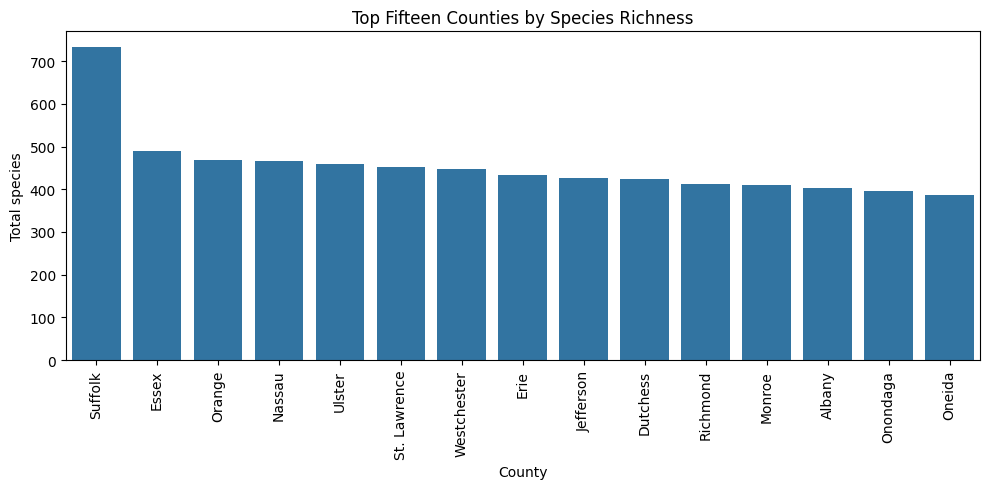

In [19]:
plt.figure(figsize=(10, 5))

sns.barplot(data=top15, x="County", y="Total_species")
plt.xticks(rotation=90)
plt.xlabel("County")
plt.ylabel("Total species")
plt.title("Top Fifteen Counties by Species Richness")

plt.tight_layout()
plt.show()

**What Does This Mean**: The bars show that Suffolk has the highest species richness by a large margin, followed by Essex, Orange, and Nassau, with the remaining top counties clustered at lower but still high species counts.


#### 2.2 Species Count by Tax Group

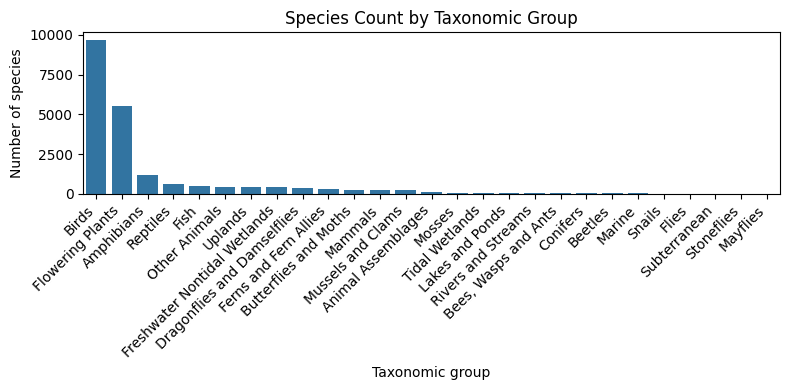

In [20]:
group_counts = biodiversity_simple['Tax_group'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(x=group_counts.index, y=group_counts.values)

plt.xticks(rotation=45, ha='right')
plt.title("Species Count by Taxonomic Group")
plt.xlabel("Taxonomic group")
plt.ylabel("Number of species")
    
plt.tight_layout()
plt.show()

**What Does This Mean**: The bar chart shows the total number of species in each taxonomic group across the dataset. Birds make up the largest taxonomic group in the dataset, with about 9500 species. Followed by flowering plants and amphibians, with all other groups showing much smaller species counts.



#### 2.3 Federal Staus Distribution

In [21]:
#The table shows the number of species in each federal status category for every county.

pd.crosstab(biodiversity_simple['County'], biodiversity_simple['Fed_status'])

Fed_status,Endangered,Proposed Endangered,Proposed Threatened,Threatened,not applicable,not listed
County,,,,,,
Albany,6,0,0,2,20,375
Allegany,0,0,0,1,3,237
Atlantic Ocean and Long Island Sound,9,0,0,2,2,1
Bronx,2,0,0,3,5,279
Broome,0,0,0,1,0,244
...,...,...,...,...,...,...
Washington,1,0,0,2,27,321
Wayne,0,0,0,3,14,285
Westchester,2,0,0,4,16,426


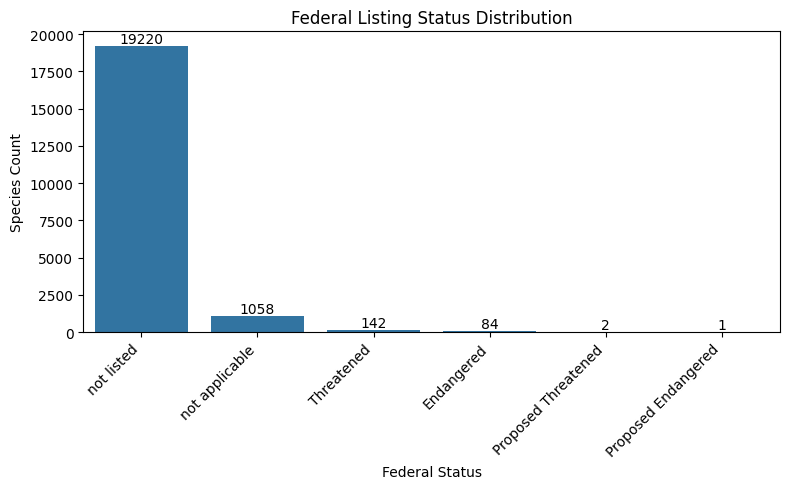

In [22]:
status_counts = biodiversity_simple['Fed_status'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=status_counts.index, y=status_counts.values)

plt.xticks(rotation=45, ha='right')
plt.title("Federal Listing Status Distribution")
plt.xlabel("Federal Status")
plt.ylabel("Species Count")
for i, value in enumerate(status_counts.values):
    ax.text(i, value, str(value), ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

**What Does This Mean**: The chart shows how many species in the dataset fall into each federal listing status. Most species have no federal status at all, approx 19500 species. Smaller bars represent species that are federally listed as threatened, endangered, or species of concern. These groups have much lower counts. This pattern shows that only a small share of species in the dataset have federal protection. It also means that rare or at risk species are a small portion of the overall biodiversity records.

#### 2.4 NY State Status Distrubution

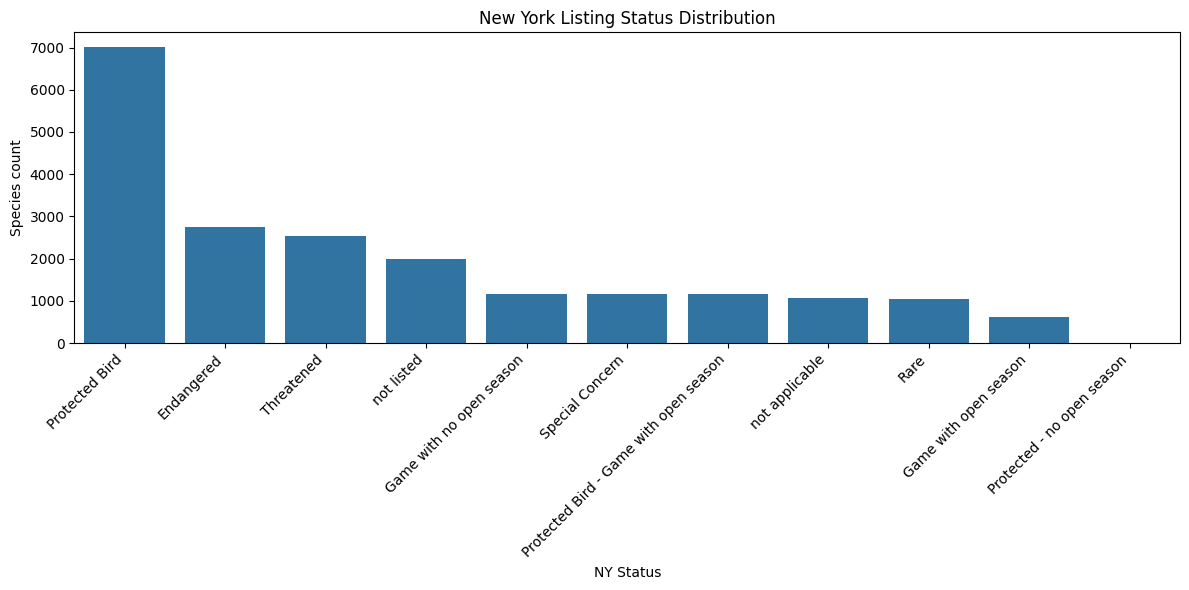

In [23]:
ny_counts = biodiversity_simple['NY_status'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x = ny_counts.index, y=ny_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title("New York Listing Status Distribution")
plt.xlabel("NY Status")
plt.ylabel("Species count")

plt.tight_layout()
plt.show()

**What Does it Show**: It shows how species are classified under New York State’s listing categories. Most species are listed as protected birds, followed by endangered and threatened categories, while all other status groups contain much smaller numbers.

#### 2.5 Rare Species vs Total Species Relationship by County

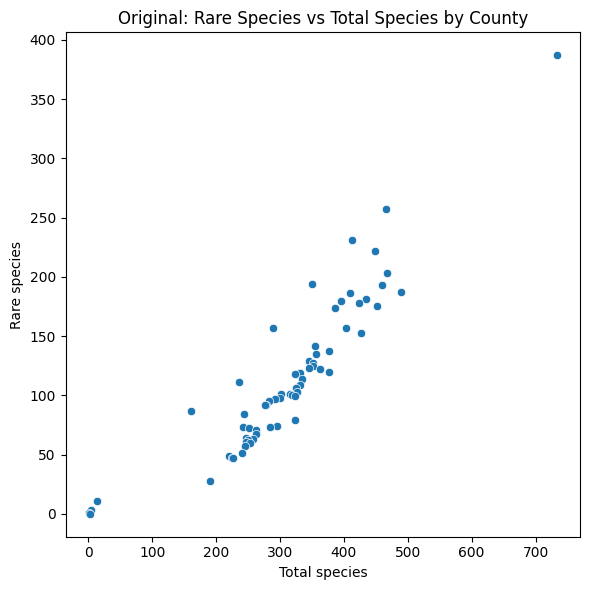

               Total_species  Rare_species
Total_species       1.000000      0.911912
Rare_species        0.911912      1.000000


In [24]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=combined["Total_species"], y=combined["Rare_species"])

plt.xlabel("Total species")
plt.ylabel("Rare species")
plt.title("Original: Rare Species vs Total Species by County")
plt.tight_layout()
plt.show()

print(combined[["Total_species", "Rare_species"]].corr())

**What Does this Show**: Counties with more total species also have more rare species, and the fitted line shows this positive linear pattern clearly, which matches the earlier finding that Suffolk County has both the highest total species and the highest rare species, suggesting that counties with richer habitats tend to support both common and rare species and may have higher conservation value.

#### Log10 Transformation

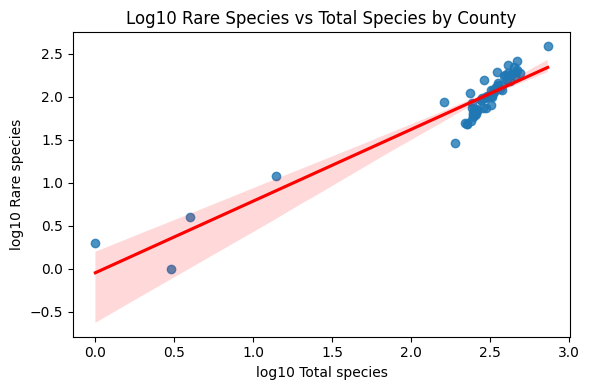

In [25]:
combined["log_total"] = np.log10(combined["Total_species"])
combined["log_rare"] = np.log10(combined["Rare_species"] + 1)

plt.figure(figsize=(6, 4))
sns.regplot(
    data=combined,
    x="log_total",
    y="log_rare",
    scatter=True,
    line_kws={"color": "red"})

plt.xlabel("log10 Total species")
plt.ylabel("log10 Rare species")
plt.title("Log10 Rare Species vs Total Species by County")  # Fixed missing closing quote

plt.tight_layout()
plt.show()

**What Does This Show**: Counties with higher log10 total species also have higher log10 rare species, and the strong upward trend shows that rare species increase in step with overall biodiversity.

#### Side by Side Comparison

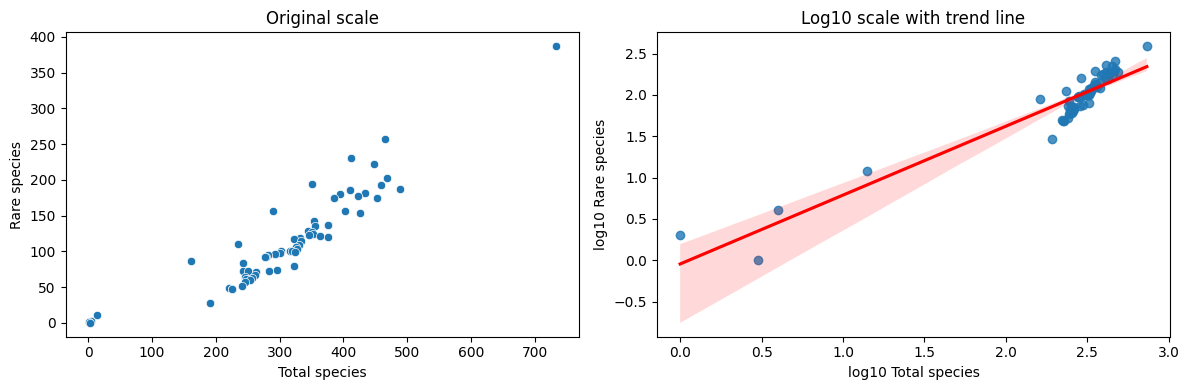

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(data=combined, x="Total_species", y="Rare_species", ax=axes[0])
axes[0].set_xlabel("Total species")
axes[0].set_ylabel("Rare species")
axes[0].set_title("Original scale")

sns.regplot(data=combined, x="log_total", y="log_rare", scatter=True, line_kws={"color": "red"}, ax=axes[1])
axes[1].set_xlabel("log10 Total species")
axes[1].set_ylabel("log10 Rare species")
axes[1].set_title("Log10 scale with trend line")

plt.tight_layout()
plt.show()

**What Does this Show**: The left plot shows the original values where counties with more total species generally have more rare species. The right plot shows the same relationship on a log10 scale, and the trend line makes the positive relationship clearer, showing that rare species increase in step with overall species richness.

## 3) Inference

I would like to investigate whether counties with larger total species richness also support more rare or at-risk species?

* My null hypothesis states that there is no relationship between total species richness and the number of rare species.
* My alternative hypothesis states that they're counties with higher species richness also have more rare species.
  
To answer this question, I will use the cleaned county level dataset that contains total species counts and rare species counts for all counties. First, I will calculate the proportion of rare species for each county to put the values on the same scale. Next, I will classify counties into low, medium, and high richness groups based on total species counts. This creates three categories that allow for direct comparisons. 

To test whether this difference could appear by random chance, I will perform a bootstrap and resampling procedure. In each bootstrap sample, I will resample counties with replacement and randomly shuffle the rare species proportion values. This breaks any real relationship between species richness and rare species. I will then classify counties again and compute the difference between high and low richness groups for that shuffled sample.

Repeating this many times generates a distribution of differences expected under the null hypothesis. If the observed difference in the real data falls far outside the simulated distribution, it provides evidence that the null hypothesis is unlikely and supports the alternative hypothesis.

This approach directly tests whether counties with higher species richness truly support more rare species than expected by chance and allows a clear interpretation of the relationship between richness and rarity across New York counties.

In [27]:
from copy import deepcopy
biodiversity_edit = deepcopy(biodiversity_simple)
biodiversity_edit.head()

,County,Category,Tax_group,Tax_subgroup,Species_scientific,Common_species,NY_status,Fed_status,State_rank,Global_rank,Distribution,Rare_flag
0,Albany,Animal,Amphibians,Frogs and Toads,Anaxyrus americanus,American Toad,Game with open season,not listed,S5,G5,Recently Confirmed,False
1,Albany,Animal,Amphibians,Frogs and Toads,Anaxyrus fowleri,Fowler's Toad,Game with open season,not listed,S4,G5,Recently Confirmed,False
2,Albany,Animal,Amphibians,Frogs and Toads,Hyla versicolor,Gray Treefrog,Game with open season,not listed,S5,G5,Recently Confirmed,False
3,Albany,Animal,Amphibians,Frogs and Toads,Lithobates catesbeianus,Bullfrog,Game with open season,not listed,S5,G5,Recently Confirmed,False
4,Albany,Animal,Amphibians,Frogs and Toads,Lithobates clamitans,Green Frog,Game with open season,not listed,S5,G5,Recently Confirmed,False


In [28]:
combined_edit = (
    biodiversity_edit.groupby("County").agg(
        Total_species=("Species_scientific", "nunique"),
        Rare_species=("Rare_flag", "sum")
    ).reset_index()
)
combined_edit["Rare_species"] = combined_edit["Rare_species"].astype(int)

In [29]:
#Creates a new column "Rare_prop" and Calculates it by Rare_species divided by Total_species
combined_edit["Rare_prop"] = combined_edit["Rare_species"] / combined_edit["Total_species"]
combined_edit.head(100)

,County,Total_species,Rare_species,Rare_prop
0,Albany,403,157,0.389578
1,Allegany,241,51,0.211618
2,Atlantic Ocean and Long Island Sound,14,11,0.785714
3,Bronx,289,157,0.543253
4,Broome,245,57,0.232653
...,...,...,...,...
61,Washington,351,127,0.361823
62,Wayne,302,101,0.334437
63,Westchester,448,222,0.495536
64,Wyoming,263,71,0.269962


Shows County, Total_species, Rare_species, and Rare_prop for each county (Albany, Allegany, Atlantic Ocean and Long Island Sound, Bronx, Broome shown).

In [30]:
#This code creates a categorical variable that classifies counties into richness classes based on 
#their total species count

cutoffs = np.percentile(combined_edit["Total_species"], [33, 66])

combined_edit["Richness_class"] = pd.cut( #Creates a new column "Richness_class"
    combined_edit["Total_species"],
    bins=[-np.inf, cutoffs[0], cutoffs[1], np.inf],
    labels=["Low", "Medium", "High"]
)
combined_edit.head(10)

,County,Total_species,Rare_species,Rare_prop,Richness_class
0,Albany,403,157,0.389578,High
1,Allegany,241,51,0.211618,Low
2,Atlantic Ocean and Long Island Sound,14,11,0.785714,Low
3,Bronx,289,157,0.543253,Medium
4,Broome,245,57,0.232653,Low
5,Cattaraugus,346,123,0.355491,Medium
6,Cayuga,345,129,0.373913,Medium
7,Chautauqua,325,106,0.326154,Medium
8,Chemung,282,95,0.336879,Medium
9,Chenango,247,61,0.246964,Low


Each county is now classified as having "Low", "Medium", or "High" species richness.

#### Observed Difference

In [31]:
#compares average rare proportions in high richness counties and low richness counties

def diff_in_means(df):
    class_means = df.groupby("Richness_class", observed=False)["Rare_prop"].mean()
    high_val = class_means.loc["High"]
    low_val = class_means.loc["Low"]
    return high_val - low_val

observed_diff = diff_in_means(combined_edit)
print("Observed difference High minus Low:", observed_diff)

Observed difference High minus Low: 0.08527827134082222


The observed difference in means is about 0.085, meaning high richness counties have rare species making up about 8 percent more of their total species on average compared to low richness counties.

#### Null Distribution

In [32]:
TRIALS = 1000
simulated_diffs = []

for i in range(TRIALS):
  
    resampled = combined_edit.sample(frac=1, replace=True).copy()

    resampled["Rare_prop"] = np.random.permutation(resampled["Rare_prop"])
    
#measure the simulated difference under the assumption that richness and rarity have no relationship.
    
    cutoffs = np.percentile(resampled["Total_species"], [33, 66])
    resampled["Richness_class"] = pd.cut(
        resampled["Total_species"],
        bins=[-np.inf, cutoffs[0], cutoffs[1], np.inf],
        labels=["Low", "Medium", "High"]
    )
  
    diff = diff_in_means(resampled)
    simulated_diffs.append(diff)

#### Confidence Interval of Our Simulations:

In [33]:
ci_lower = np.percentile(simulated_diffs, 2.5)
ci_upper = np.percentile(simulated_diffs, 97.5)
print("95 percent confidence interval:", ci_lower, "to", ci_upper)

95 percent confidence interval: -0.08398270531386201 to 0.08235353572481033


In [34]:
ci_lower = np.percentile(simulated_diffs, 2.5)
ci_upper = np.percentile(simulated_diffs, 97.5)
print("95 percent confidence interval:", ci_lower, "to", ci_upper)
print("Observed difference:", observed_diff)

if observed_diff < ci_lower or observed_diff > ci_upper:
    print("Result: Statistically significant (p < 0.05)")
else:
    print("Result: Not statistically significant")

95 percent confidence interval: -0.08398270531386201 to 0.08235353572481033
Observed difference: 0.08527827134082222
Result: Statistically significant (p < 0.05)


#### Plot Null Distribution

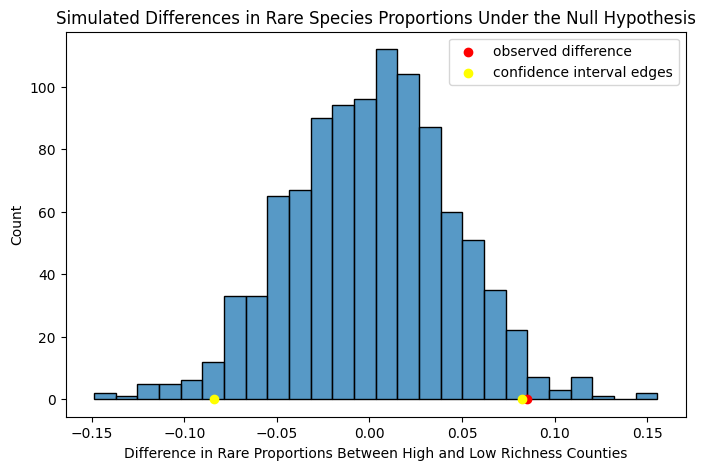

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(simulated_diffs)
plt.scatter(x=observed_diff, y=-0.002, color='red', label='observed difference')
plt.scatter(x=[ci_lower, ci_upper], y=[0,0], color='yellow', label='confidence interval edges')
plt.legend()
plt.title("Simulated Differences in Rare Species Proportions Under the Null Hypothesis")
plt.xlabel("Difference in Rare Proportions Between High and Low Richness Counties")

plt.show()

The yellow points mark the edges of the 95 percent confidence interval for these simulated differences. These show the range of values that are likely to appear by chance alone.

The red point marks the observed difference from the real data. It shows how much higher the rare species proportion is in high richness counties compared to low richness counties.

**What Does This Mean:**  The red point sits very close to the upper boundary of the null distribution. It is larger than most of the simulated differences produced under the assumption that richness and rarity are unrelated. This makes the observed difference somewhat unusual compared to what random chance would normally generate. Since the observed value is near the edge of the null range and the p value is below 0.05, the results suggest that high richness counties tend to have a higher proportion of rare species than low richness counties.

#### P-Value

In [36]:
p_value = (np.abs(simulated_diffs) >= np.abs(observed_diff)).mean()

print("Observed difference:", observed_diff)
print("P value:", p_value)

Observed difference: 0.08527827134082222
P value: 0.044


The p value of about 0.043 shows that only about 4 percent of simulated differences were as extreme as the real one. This crosses the 0.05 threshold, which gives moderate evidence for your alternative hypothesis.

#### Conclusion

This p value answers the question of: If there is no real difference in the rare species proportions of high richness and low richness counties, how likely is it to see a difference in means as large as the one found in the real data?

Our p value of 0.043 shows that the observed difference of about 0.085 would be unlikely to appear by chance alone. High richness counties have rare species making up about 8% more of their total species on average than low richness counties.

The observed difference sits near the upper boundary of the null distribution. This means it is larger than most of the differences produced when richness and rarity are unrelated. Since it is not located near the center of the null distribution, the real data show a stronger difference than random chance would usually generate. **This supports the alternative hypothesis that high richness counties tend to contain a higher proportion of rare species.**

Even though the observed difference is close to the upper edge of the 95% confidence interval, the p value still falls below the 0.05 threshold. This provides enough evidence to **reject the null hypothesis** and conclude that species rich counties in New York support a larger share of rare or at risk species than counties with lower overall richness.


#### Crituques

One factor that may have affected the results is the way counties were grouped into low, medium, and high richness categories. The cutoffs were based on the lower, middle, and upper thirds of the total species distribution. This kept the groups evenly sized, but it may not reflect meaningful ecological differences between counties. Some counties have unusual habitats such as coastal areas, large wetlands, or major river systems, and these features can increase both species richness and rare species counts.

Another limitation is that survey effort varies across counties. Counties with more observations recorded will appear to have higher total species counts and may also show more rare species simply because more data were collected there. This can inflate the observed difference and make heavily sampled counties look more biologically rich than they actually are.

Because of these issues, the observed pattern may partly reflect differences in sampling rather than natural ecological structure. Future analysis that includes survey effort, habitat diversity, or land cover data would give a more accurate picture of the relationship between species richness and rare species proportions.


## 4) Prediction

My goal is to predict the number of rare or at risk species in each county using variables that describe overall biodiversity. I want a model that predicts rare species counts and also shows which ecological factors contribute most to those counts. My target variable is rare species count, which is numeric.

In [190]:
combined_edit.columns

Index(['County', 'Total_species', 'Rare_species', 'Rare_prop',
       'Richness_class'],
      dtype='object')

#### 
The predictor variables I will use to build a model for predicting rare species counts are:


• Total_species

• Rare_prop

The predictor variables I use are total species and rare proportion. Total richness captures overall biodiversity. Rare proportion shows how much of the community is made up of rare species. These variables showed the strongest structure in my earlier exploration.

Regression is better than classification for my dataset because my target is a numeric value. I want to predict how many rare species occur in each county, not assign counties to groups. Classification would require creating artificial categories and would remove important information. Regression matches the clear linear relationship between total richness and rare species counts in the data.

I want a model that is simple, stable, and interpretable. It should generalize to counties not used in training and give reasonable predictions for rare species counts. Because the ecological pattern is mostly linear, a model that captures a straight line trend without overfitting is desirable.

In [192]:
#defined X and Y
X = combined_edit[['Total_species','Rare_prop']]
y = np.array(combined_edit['Rare_species'])

I defined the predictors and target so I can build models that relate biodiversity to rare species counts.

#### Basic Linear Relationship

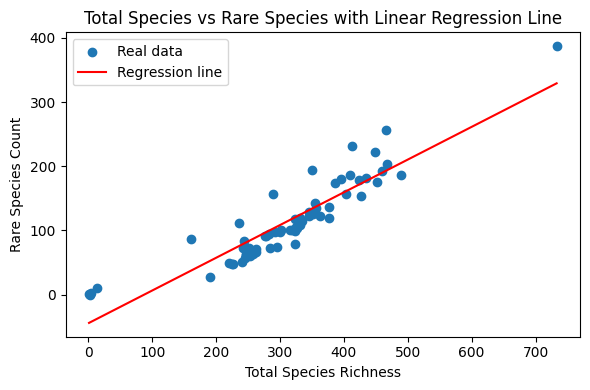

In [196]:
x_all = combined_edit['Total_species'].values.reshape(-1, 1)
y_all = combined_edit['Rare_species'].values

lin_model_all = LinearRegression()
lin_model_all.fit(x_all, y_all)

sort_idx = np.argsort(x_all.flatten())
x_sorted = x_all[sort_idx]
y_sorted_pred = lin_model_all.predict(x_sorted)

plt.figure(figsize=(6,4))
plt.scatter(x_all, y_all, label='Real data')
plt.plot(x_sorted, y_sorted_pred, color='red', label='Regression line')
plt.xlabel('Total Species Richness')
plt.ylabel('Rare Species Count')
plt.title('Total Species vs Rare Species with Linear Regression Line')
plt.legend()
plt.tight_layout()
plt.show()

To show the basic structure of the data, I fit a simple linear regression line to all counties. The plot shows a strong upward linear pattern, which supports using regression models.

#### Train Test Split

I split the data into training and test sets so the model can be fit on some counties and evaluated on unseen counties. This gives an unbiased measure of how well the model generalizes.

In [194]:
# FIRST, SPLIT OUR DATA INTO TRAIN AND TEST:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (46, 2)
Test shape: (20, 2)


#### RMSE Function + Cross Validation Function

In regularization, we split the data into training and test sets, scale the predictors, and fit ridge regression on the training set. We then test different penalty values and measure their validation error using RMSE. After choosing the best penalty, we fit the final model and use it to predict the test data

In [174]:
def rmse(actual_y, predicted_y):
    mse = ((actual_y - predicted_y) ** 2).mean()
    return np.sqrt(mse)

I created a root mean squared error function to measure prediction error. RMSE tells me how far the predictions are from the true rare species counts. I also wrote a cross validation function to test how well a model performs on different subsets of the training data.

In [195]:
    
def compute_CV_error(model, X_train, y_train):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    validation_errors = []

    for train_idx, valid_idx in kf.split(X_train):
        split_X_train = X_train.iloc[train_idx]
        split_X_valid = X_train.iloc[valid_idx]

        # y_train is a numpy array; use array indexing
        split_y_train = y_train[train_idx]
        split_y_valid = y_train[valid_idx]

        scaler = StandardScaler()
        split_X_train_scaled = scaler.fit_transform(split_X_train)
        split_X_valid_scaled = scaler.transform(split_X_valid)

        model.fit(split_X_train_scaled, split_y_train)
        pred_y_valid = model.predict(split_X_valid_scaled)
        error = rmse(split_y_valid, pred_y_valid)
        validation_errors.append(error)

    return np.mean(validation_errors)

#### Linear Regression Model

I am using linear regression here because my target variable, rare species count, is numeric, and the relationship between species richness and rare species is strongly linear in my data.

In [176]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()

lin_model.fit(X_train[['Total_species']], y_train)

y_pred_lin = lin_model.predict(X_test[['Total_species']])
test_rmse_lin = rmse(y_test, y_pred_lin)

print("Linear regression test RMSE:", test_rmse_lin)

Linear regression test RMSE: 29.93488293797975


I trained a linear regression model using total richness. The test RMSE was about thirty. This means the model’s predictions are usually about thirty rare species away from the truth for a typical county. The linear model is my baseline.

#### Ridge Regression

Ridge regression is a type of linear regression that adds a penalty to keep the model from using very large coefficients. It still fits a straight line, but it makes the line more stable by shrinking the coefficient values when needed.

In [177]:
from sklearn.linear_model import Ridge
import numpy as np

alphas = [0.01, 0.1, 1, 10, 100]
cv_errors = []

for a in alphas:
    ridge_model = Ridge(alpha=a)
    error = compute_CV_error(ridge_model, X_train, y_train)
    cv_errors.append(error)
    print("Alpha:", a, "CV RMSE:", error)

best_index = int(np.argmin(cv_errors))
best_alpha = alphas[best_index]

print("Best alpha:", best_alpha)

Alpha: 0.01 CV RMSE: 15.69627291851883
Alpha: 0.1 CV RMSE: 15.698210952499105
Alpha: 1 CV RMSE: 15.793152680817977
Alpha: 10 CV RMSE: 21.961392659648336
Alpha: 100 CV RMSE: 51.86575531605454
Best alpha: 0.01


Best alpha: 0.01 - This means the model performs best when regularization is very weak, almost the same as normal linear regression.

#### Fit Final Ridge Model + Evaluate on Test Set Code

In [178]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Ridge model with the best alpha
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_ridge = best_ridge.predict(X_test_scaled)

# Calculate RMSE
test_rmse_ridge = rmse(y_test, y_pred_ridge)

# Print the test RMSE
print("Ridge regression test RMSE:", test_rmse_ridge)

Ridge regression test RMSE: 31.480144918827424


I fit the final ridge model using the best alpha. Its test RMSE was about thirty one. This is slightly worse than the linear model, which means ridge does not improve prediction for this dataset.

#### Results Table

In [179]:
pd.DataFrame({
"Model": ["Linear", "Ridge"],
"Test_RMSE": [test_rmse_lin, test_rmse_ridge],
"Best_alpha": ["n/a", best_alpha]
})

,Model,Test_RMSE,Best_alpha
0,Linear,29.934883,n/a
1,Ridge,31.480145,0.01


**What Does it Mean:** The linear regression model produced a lower test RMSE than the ridge model, which shows that total species richness alone predicts rare species counts more accurately than the regularized model, and ridge regression did not improve performance even with the best alpha value of 0.01.

#### Observed vs Pedicted Plot

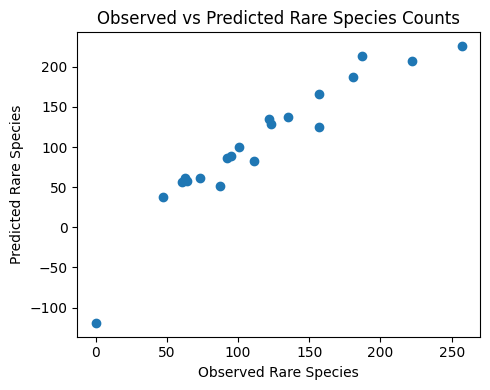

In [180]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))

plt.scatter(y_test, y_pred_ridge)
plt.xlabel("Observed Rare Species")
plt.ylabel("Predicted Rare Species")
plt.title("Observed vs Predicted Rare Species Counts")
plt.tight_layout()
plt.show()

**What Does This Mean:** The plot shows that most counties fall close to a rising line, which means the model generally predicts higher rare species counts for counties that truly have more rare species. There is some spread around the line, including one large negative residual, but no strong curved pattern. This indicates the relationship is mostly linear and the model is not missing major structure.

#### Residual Plot

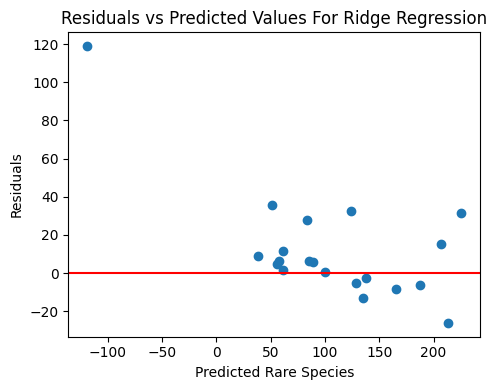

In [181]:
residuals = y_test - y_pred_ridge

plt.figure(figsize=(5,4))

plt.scatter(y_pred_ridge, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Rare Species")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values For Ridge Regression")

plt.tight_layout()
plt.show()

**What Does This Mean:** The residuals are mostly centered near zero with no clear pattern, which means the model fits the linear trend well, although one strong positive residual shows that the model under predicted rare species for one county.

#### Comparing Models

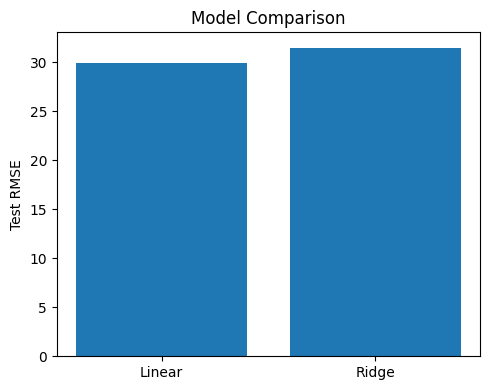

In [184]:
models = ['Linear', 'Ridge']
rmse_values = [test_rmse_lin, test_rmse_ridge]

plt.figure(figsize=(5,4))
plt.bar(models, rmse_values)
plt.ylabel('Test RMSE')
plt.title('Model Comparison')
plt.tight_layout()
plt.show()

**What Does This Mean:** The visual shows that the linear model has a slightly lower test RMSE than the ridge model. This means the linear model predicts rare species counts more accurately on unseen counties and is the better choice for your final model.


#### Model Evaluation

The final model was evaluated using root mean squared error, which measures how far the predictions are from the real rare species counts. The linear regression model had a test RMSE of about thirty, meaning its predictions were usually within thirty rare species of the true value for a county. The ridge model performed slightly worse with a test RMSE of about thirty one. The residual plot showed mostly random scatter around zero, which indicates the model captures the main pattern in the data without strong bias. The observed versus predicted plot also showed a clear rising pattern, which confirms that the model correctly predicts higher rarity in counties with more species. These results show that the linear model is the most accurate and stable option for this dataset.

#### Final Model Selection

The linear regression model was selected as the final model because it had the lowest test RMSE and produced the most accurate predictions for unseen counties. Ridge regression did not improve performance, even with tuning, because the relationship between total species richness and rare species counts is already strongly linear and does not need regularization. The plots and error values show that the linear model captures the main pattern in the data with the least error, making it the least wrong model for this dataset.

#### Coefficient Tables

In [188]:
ridge_coefs = best_ridge.coef_

coef_table = pd.DataFrame({
    "variable": X_train.columns,
    "coefficient": ridge_coefs
})

print(coef_table)

        variable  coefficient
0  Total_species    67.762351
1      Rare_prop    23.392417


**What This Means:** The coefficient table shows that total species richness is the strongest predictor. Counties with more total species tend to have far more rare species. Rare proportion contributes less but still supports prediction.

#### Critique

The main limitation in this model is the lack of detailed ecological predictors. Total richness and a proportion measure do not capture habitat size, land cover, climate, or survey effort. Survey effort varies across counties, which introduces bias. The dataset is also small. More environmental information would improve prediction.

#### Model Utility

The final model is useful because it can estimate the number of rare species a county is likely to have based on basic biodiversity measures. This helps identify counties that may be under surveyed. If the model predicts many rare species but only a few are documented, that county is a good candidate for more field work. The model also helps highlight counties where protecting overall species richness is likely to protect rare species at the same time. This supports conservation planning by pointing to areas where resources could have the strongest ecological impact. While the model is helpful, it would be more useful with additional predictors such as habitat area, land cover, climate data, and survey effort. Adding these variables would make predictions more accurate and allow the model to describe rarity in finer detail.